# Function Definitions

In [1]:
import numpy as np

def approx (num, rel, tol, cmpr) :
	# Check if num is lower than relative
	if cmpr == -1 :
		return (rel - num)/np.abs(rel) <= tol

	# Check absolute difference to relative
	if cmpr == 0 :
		return np.abs(num - rel)/np.abs(rel) <= tol

	# Check if num is higher than relative
	if cmpr == 1 :
		return (num - rel)/np.abs(rel) <= tol

x_min = 0

def obj (x) :
	global x_min
    # objective 1  [x^2] ---> x_min = 0, f(x_min) = 0
    # x_min = 0
    # return np.square (x)
    
    # objective 2 [x^4 + x^3 - 10x^2 + x + 5] ---> x_min = -2.6629, f(x_min) = -37.1732
    # x_min = -2.6629,
    # return np.power(x, 4) + np.power(x, 3) - 10*np.square(x) + x + 5
    
    # objective 3 [0.025*x^2 + sin(x)] ---> x_min = 1.49593, f(x_min) = -0.94125366117
	x_min = -1.49593
	return 0.025*np.square(x) + np.sin(x)

def objDer (x) :
	# Objective 1
	# return 2*x

	# Objective 2
	# return 4*np.pow(x,3) + 3*np.pow(x,2) - 20*np.pow(x) + 1

	# Objective 3
	return 0.05*x + np.cos(x)

def logistic (x, r) :
    return r * x * (1 - x) 

def getTimeSeries (length, r) :
    x0 = 0.01
    n = np.arange (1, length+1)
    xs = [x0]
    x = x0
    
    for i in range (1, length) :
        x = logistic (x, r)
        xs.append (x)
        
    xs = np.array (xs)
    return (n, xs)

def getChaosPoints (num, r) :
    if num < 1000 :
        seriesLength = 1000
    else :
        seriesLength = 2*num 
        
    return getTimeSeries (seriesLength, r)[1][-num:]

# PSO Loop with Final Fitness Plot

Vanilla correct for gbestVan = [-1.49592992]
Chaos correct for gbestChaos = [-1.49592991]
Same gbest
cntVan = 17
cntChaos = 14
Vanilla Final Average fitness = -0.5328046580223607
Chaotic Final Average fitness = -0.44789621145940134


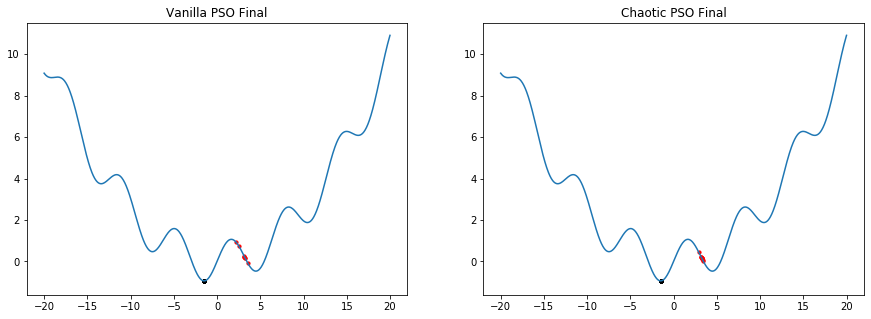

In [66]:
from statistics import mean

Nx = 25
w = 0.7
c1 = 1.5
c2 = 1.5

left = -20
right = 20
intervalLength = right - left
intervalMid = (left+right)/2.0

while True :
    r1 = np.random.rand ()
    r2 = np.random.rand ()
    xVan = intervalLength * np.random.rand(Nx, 1) - intervalLength/2
    vVan = intervalLength/100.0 * np.random.rand(Nx, 1) - intervalLength/(2*100)
    xChaos = np.reshape (intervalLength * getChaosPoints (Nx, 4) - intervalMid, (-1,1))
    vChaos = np.reshape (intervalLength/100.0 * getChaosPoints (Nx, 4) - intervalLength/(2*100), (-1,1))
    pbestVan = xVan
    pbestChaos = xChaos

    numIter = 1000
    gbestVan = min (xVan , key = lambda x : obj(x))
    gbestChaos = min (xChaos , key = lambda x : obj(x))

    ################################################################################################
    # Plot 1 list -----------------> Gbest point per iteration
    gbvCache = [gbestVan]
    gbcCache = [gbestChaos]

    # Plot 2 list -----------------> Gbest point objective value per iteration
    gbvoCache = [obj(gbestVan)]
    gbcoCache = [obj(gbestChaos)]

    # Plot 3 list -----------------> Average of points 
    xavgvCache = [np.average (xVan)]
    xavgcCache = [np.average (xChaos)]

    # Plot 4 list -----------------> Average of fitness
    xoavgvCache = [np.average (obj(xVan))]
    xoavgcCache = [np.average (obj(xChaos))]

    # Plot 5 list -----------------> Average of absolute velocity
    vavgvCache = [np.average (abs(vVan))]
    vavgcCache = [np.average (abs(vChaos))]

    # Plot 6 list -----------------> Average of pbest fitness
    pbavgvCache = [np.average (obj(pbestVan))]
    pbavgcCache = [np.average (obj(pbestChaos))]
    ################################################################################################

    for i in range (0, numIter) :
        vVan = w*vVan + c1*r1*(pbestVan - xVan) + c2*r2*(gbestVan - xVan)
        vChaos = w*vChaos + c1*r1*(pbestChaos - xChaos) + c2*r2*(gbestChaos - xChaos)
        xVan = xVan + vVan
        xChaos = xChaos + vChaos

        less = obj(xVan) < obj(pbestVan)
        pbestVan = less * xVan + np.invert (less) * pbestVan
        less = obj(xChaos) < obj(pbestChaos)
        pbestChaos = less * xChaos + np.invert (less) * pbestChaos

        ################################################################################################
        gbestVan = min (xVan , key = lambda x : obj(x))
        gbestChaos = min (xChaos , key = lambda x : obj(x))

        # Appending to list for plot 1
        gbvCache.append (gbestVan)
        gbcCache.append (gbestChaos)

        # Appending to list for plot 2
        gbvoCache.append (obj(gbestVan))
        gbcoCache.append (obj(gbestChaos))

        # Appending to list for plot 3
        xavgvCache.append (np.average (xVan))
        xavgcCache.append (np.average (xChaos))

        # Appending to list for plot 4
        xoavgvCache.append (np.average (obj(xVan)))
        xoavgcCache.append (np.average (obj(xChaos)))

        # Appending to list for plot 5
        vavgvCache.append (np.average (abs(vVan)))
        vavgcCache.append (np.average (abs(vChaos)))

        # Appending to list for plot 6
        pbavgvCache.append (np.average (obj(pbestVan)))
        pbavgcCache.append (np.average (obj(pbestChaos)))
        ################################################################################################
        
    globMinVan = approx (xVan, gbestVan, 0.1, 0)
    cntVan = sum (globMinVan)[0]
    corrVan = xVan[globMinVan]
    otherVan = xVan[np.invert(globMinVan)]
    otherVanDer = np.array (list (zip (otherVan, objDer(otherVan))))

    globMinChaos = approx (xChaos, gbestChaos, 0.1, 0)
    cntChaos = sum (globMinChaos)[0]
    corrChaos = xChaos[globMinChaos]
    otherChaos = xChaos[np.invert(globMinChaos)]
    otherChaosDer = np.array (list (zip (otherChaos, objDer(otherChaos))))
    
    if approx (gbestVan, x_min, 0.1, 0)[0] :
        currMinVan = True
    else :
        currMinVan = False
    if approx (gbestChaos, x_min, 0.1, 0)[0] :
        currMinChaos = True
    else :
        currMinChaos = False

    if currMinVan and currMinChaos and cntChaos < cntVan :
        break
    

import matplotlib.pyplot as plt
dotsize = 10

print ("Vanilla correct for gbestVan = " + str(gbestVan))
print ("Chaos correct for gbestChaos = " + str(gbestChaos))
if approx(gbestVan, gbestChaos, 0.1, 0) :
    pass
    print ("Same gbest")
else :
    pass
    print ("Different gbest f(" + str(gbestVan[0]) +") = " +str(obj(gbestVan)) + ", f(" + str(gbestChaos[0]) +") =" +str(obj(gbestChaos)))

print ("cntVan = " + str(cntVan))
print ("cntChaos = " + str(cntChaos))
print ("Vanilla Final Average fitness = " + str(xoavgvCache[-1]))
print ("Chaotic Final Average fitness = " + str(xoavgcCache[-1]))
    
xaxis = np.linspace (left, right, 1000)
plt.figure(figsize = (15, 5))
plt.subplot (1, 2, 1)
plt.title ("Vanilla PSO Final")
plt.plot (xaxis, obj(xaxis))
plt.scatter (corrVan, obj(corrVan), color='k', s=dotsize)
plt.scatter (otherVan, obj(otherVan), color='r', s=dotsize)

plt.subplot (1, 2, 2)
plt.title ("Chaotic PSO Final")
plt.plot (xaxis, obj(xaxis))
plt.scatter (corrChaos, obj(corrChaos), color='k', s=dotsize)
plt.scatter (otherChaos, obj(otherChaos), color='r', s=dotsize)

plt.show ()